# **JSC270 Assignment 4 Natural Language Processing**
### Authors: Steven Liu, William Zhang

## Part I: Sentiment Analysis with a Twitter Dataset

In [1]:
## Importing
import pandas as pd
from google.colab import files
import io
import numpy as np
import re


In [2]:
## file uploading
test_file = files.upload()
train_file = files.upload()

Saving covid-tweets-test.csv to covid-tweets-test.csv


Saving covid-tweets-train.csv to covid-tweets-train.csv


In [3]:
test_data = pd.read_csv(io.BytesIO(test_file['covid-tweets-test.csv']), sep = ',')
train_data = pd.read_csv(io.BytesIO(train_file['covid-tweets-train.csv']), sep = ',')
del test_data['Unnamed: 0']
del train_data['Unnamed: 0']

In [4]:
train_data = train_data.dropna()
test_data = test_data.dropna()
test_data = test_data[test_data['Sentiment'].isin(['0','1','2', 0, 1, 2])]
test_data['Sentiment'] = test_data['Sentiment'].astype('int64')
train_data = train_data[train_data['Sentiment'].isin(['0','1','2', 0, 1, 2])]
train_data['Sentiment'] = train_data['Sentiment'].astype('int64')

A) (1 pt) Consider the training data. What is the balance between the three classes? In other words, what proportion of the observations (in the training set) belong to each class?

In [5]:
proportion = [train_data[train_data['Sentiment'] == 0].shape[0]/train_data.shape[0],
     train_data[train_data['Sentiment'] == 1].shape[0]/train_data.shape[0],
     train_data[train_data['Sentiment'] == 2].shape[0]/train_data.shape[0]]
proportion

[0.37415858666861074, 0.18740735340574954, 0.4384340599256397]

B) (1 pt) Tokenize the tweets. In other words, for each observation, convert the tweet from a single string of running text into a list of individual tokens (possibly with punctuation), splitting on whitespace. The result should be that each observation (tweet) is a list of individual tokens.

In [6]:
## Tokenization
tokens_test = []
tokens_train = []
for row in train_data['OriginalTweet']:
  tokens_train.append(row.split())
for row in test_data['OriginalTweet']:
  tokens_test.append(row.split())

train_data['tokens'] = tokens_train
test_data['tokens'] = tokens_test
print(train_data['tokens'].head(5))

0    [@MeNyrbie, @Phil_Gahan, @Chrisitv, https://t....
1    [advice, Talk, to, your, neighbours, family, t...
2    [Coronavirus, Australia:, Woolworths, to, give...
3    [My, food, stock, is, not, the, only, one, whi...
4    [Me,, ready, to, go, at, supermarket, during, ...
Name: tokens, dtype: object


C) (1 pt) Using a regular expression, remove any URL tokens from each of the observations.
Hint: In this dataset, all such tokens begin with “http”.


In [7]:
import re
# Same process as before
tokens_no_URL = []
# Create a list of lists with what we want
for row in train_data['tokens']:
  tokens_no_URL.append([t for t in row if re.sub('http.+','', t) != ''])
# add the new info to our df
train_data['tokens_no_URL'] = tokens_no_URL

# Same process as before
tokens_no_URL_test = []
# Create a list of lists with what we want
for row in test_data['tokens']:
  tokens_no_URL_test.append([t for t in row if re.sub('http.+','', t) != ''])
# add the new info to our df
test_data['tokens_no_URL'] = tokens_no_URL_test

print(train_data['tokens_no_URL'].head(5))

0        [@MeNyrbie, @Phil_Gahan, @Chrisitv, and, and]
1    [advice, Talk, to, your, neighbours, family, t...
2    [Coronavirus, Australia:, Woolworths, to, give...
3    [My, food, stock, is, not, the, only, one, whi...
4    [Me,, ready, to, go, at, supermarket, during, ...
Name: tokens_no_URL, dtype: object


D) (2 pts) Remove all punctuation (,.?!;:’") and special characters(@, #, +, &, =, $, etc). Also, convert all tokens to lowercase only. Can you think of a scenario when you might want to keep some forms of punctuation?

In [8]:
import re
# Same process as before
tokens_final = []
# Create a list of lists with what we want
for row in train_data['tokens_no_URL']:
  tokens_final.append([re.sub('\W','', t).lower() for t in row if re.sub('\W','', t) != ''])
# add the new info to our df
train_data['tokens_final'] = tokens_final

# Same process as before
tokens_final_test = []
# Create a list of lists with what we want
for row in test_data['tokens_no_URL']:
  tokens_final_test.append([re.sub('\W','', t).lower() for t in row if re.sub('\W','', t) != ''])
# add the new info to our df
test_data['tokens_final'] = tokens_final_test

print(train_data['tokens_final'].head(5))

0           [menyrbie, phil_gahan, chrisitv, and, and]
1    [advice, talk, to, your, neighbours, family, t...
2    [coronavirus, australia, woolworths, to, give,...
3    [my, food, stock, is, not, the, only, one, whi...
4    [me, ready, to, go, at, supermarket, during, t...
Name: tokens_final, dtype: object


E) (1pt) Now stem your tokens. This will have the effect of converting similar word forms into identical tokens (e.g. run, runs, running → run). Please specify which stemmer you use.

Note: There are several different stemmers available through nltk and Scikit-learn. I recommend the Porter stemmer, but you may use a different one if you wish.

In [9]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokens_stem = []
# Create a list of lists with what we want
for row in train_data['tokens_final']:
  tokens_stem.append([stemmer.stem(t) for t in row])
# add the new info to our df
train_data['tokens_stem'] = tokens_stem

# Same process as before
tokens_stem_test = []
# Create a list of lists with what we want
for row in test_data['tokens_final']:
  tokens_stem_test.append([stemmer.stem(t) for t in row])
# add the new info to our df
test_data['tokens_stem'] = tokens_stem_test

print(train_data['tokens_stem'].head(5))

0            [menyrbi, phil_gahan, chrisitv, and, and]
1    [advic, talk, to, your, neighbour, famili, to,...
2    [coronaviru, australia, woolworth, to, give, e...
3    [my, food, stock, is, not, the, onli, one, whi...
4    [me, readi, to, go, at, supermarket, dure, the...
Name: tokens_stem, dtype: object


F) (1pt) Lastly, remove stopwords. Using the english stopwords list from nltk, remove these common words from your observations. This list is very long (I think almost 200 words), so remove only the first 100 stopwords in the list.

Hint: The matrix of counts will be D × V , where D is the number of documents (tweets), and V is the number of features (word counts).

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')[:100]

tokens_stop = []
# Create a list of lists with what we want
for row in train_data['tokens_stem']:
  tokens_stop.append([t for t in row if t not in sw])
# add the new info to our df
train_data['tokens_stop'] = tokens_stop

# Same process as before
tokens_stop_test = []
# Create a list of lists with what we want
for row in test_data['tokens_stem']:
  tokens_stop_test.append([t for t in row if t not in sw])
# add the new info to our df
test_data['tokens_stop'] = tokens_stop_test

print(train_data['tokens_stop'].head(5))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                      [menyrbi, phil_gahan, chrisitv]
1    [advic, talk, neighbour, famili, exchang, phon...
2    [coronaviru, australia, woolworth, give, elder...
3    [food, stock, not, onli, one, empti, pleas, do...
4    [readi, go, supermarket, dure, covid19, outbre...
Name: tokens_stop, dtype: object


G) (2 pts) Now convert your lists of words into vectors of word counts. You may find Scikit-learn’s CountVectorizer useful here. What is the length of your vocabulary?


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Separate labels from features, converting to numpy arrays
X_train, y_train = train_data['tokens_stop'].to_numpy(), train_data['Sentiment'].to_numpy()
X_test, y_test = test_data['tokens_stop'].to_numpy(), test_data['Sentiment'].to_numpy()
def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None)

count_vec.fit_transform(X_train)
# Choose top 1000 vocab
count_vec.max_features = 1000
counts_train = count_vec.fit_transform(X_train)
counts_test = count_vec.transform(X_test)
print(counts_train.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


H) (4 pts) Fit a Naive Bayes model to your data. Report the training and test error of the model. Use accuracy as the error metric. Also, report the 5 most probable words in each class, along with their counts. You might find Scikit-learn’s MultinomialNB() transformer useful. Use Laplace smoothing to prevent probabilities of zero.





In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve
import matplotlib.pyplot as plt

# Let's fit the Naive Bayes model to our training data
nb = MultinomialNB(alpha = 1)
# Fit model to training data
nb.fit(counts_train, y_train)

train_preds = nb.predict(counts_train)
print("Train Accuracy:", accuracy_score(y_train, train_preds))

test_preds = nb.predict(counts_test)
print("Test Accuracy:", accuracy_score(y_test, test_preds))

df = pd.DataFrame()
df['index 0'] = nb.feature_count_[0]
df['index 1'] = nb.feature_count_[1]
df['index 2'] = nb.feature_count_[2]
print("TOP 5 words for Class 0:", [count_vec.get_feature_names_out()[index]
       for index in df['index 0'].nlargest(5).index], "\n With count:",
        [int(count) for count in df['index 0'].nlargest(5)])
print("TOP 5 words for Class 1:", [count_vec.get_feature_names_out()[index]
       for index in df['index 1'].nlargest(5).index], "\n With count:",
        [int(count) for count in df['index 1'].nlargest(5)])
print("TOP 5 words for Class 2:", [count_vec.get_feature_names_out()[index]
       for index in df['index 2'].nlargest(5).index], "\n With count:",
        [int(count) for count in df['index 2'].nlargest(5)])

Train Accuracy: 0.6803965881752569
Test Accuracy: 0.6677198525539758
TOP 5 words for Class 0: ['coronaviru', 'covid19', 'price', 'food', 'thi'] 
 With count: [6703, 4862, 4332, 3622, 3206]
TOP 5 words for Class 1: ['coronaviru', 'covid19', 'store', 'supermarket', 'price'] 
 With count: [3792, 2751, 1581, 1435, 1361]
TOP 5 words for Class 2: ['coronaviru', 'covid19', 'store', 'thi', 'price'] 
 With count: [7466, 6000, 3895, 3770, 3322]


J) (2 pts) Redo parts G-H using TF-IDF vectors instead of count vectors. You might find Scikitlearn’s TfidfVectorizer() transformer useful. Report the training and test accuracy. How does this compare to the accuracy using count vectors?  

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

tf_train = tfidf.fit_transform(counts_train)
tf_test = tfidf.transform(counts_test)

nb2 = MultinomialNB(alpha = 1)
nb2.fit(tf_train, y_train)

train_preds2 = nb2.predict(tf_train)
print("Train Accuracy:", accuracy_score(y_train, train_preds2))

test_preds2 = nb2.predict(tf_test)
print("Test Accuracy:", accuracy_score(y_test, test_preds2))



Train Accuracy: 0.6636776749046196
Test Accuracy: 0.6535018430753028


K) (3 pts) Recall lemmatization converts each word to its base form, which is a bit stronger than simply taking the stem. Redo parts E-H using TF-IDF vectors instead of count vectors. This time use lemmatization instead of stemming. Report train and test accuracy. How does the accuracy with lemmatization compare to the accuracy with stemming?

Note: Like stemmers, there are multiple lemmatizers you might use. We recommend the WordNet lemmatizer offered by nltk.

In [15]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

tokens_lem = []
# Create a list of lists with what we want
for row in train_data['tokens_final']:
  tokens_lem.append([lemmatizer.lemmatize(t) for t in row])
# add the new info to our df
train_data['tokens_lem'] = tokens_lem

# Same process as before
tokens_lem_test = []
# Create a list of lists with what we want
for row in test_data['tokens_final']:
  tokens_lem_test.append([lemmatizer.lemmatize(t) for t in row])
# add the new info to our df
test_data['tokens_lem'] = tokens_lem_test


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [16]:
# stop word removal
nltk.download('stopwords')
sw = stopwords.words('english')[:100]

tokens_stop2 = []
# Create a list of lists with what we want
for row in train_data['tokens_lem']:
  tokens_stop2.append([t for t in row if t not in sw])
# add the new info to our df
train_data['tokens_stop2'] = tokens_stop2

# Same process as before
tokens_stop2_test = []
# Create a list of lists with what we want
for row in test_data['tokens_lem']:
  tokens_stop2_test.append([t for t in row if t not in sw])
# add the new info to our df
test_data['tokens_stop2'] = tokens_stop2_test


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# count vector and TF-IDF
X_train2 = train_data['tokens_stop2'].to_numpy()
X_test2 = test_data['tokens_stop2'].to_numpy()
def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec2 = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features=1000)

counts_train2 = count_vec2.fit_transform(X_train2)
counts_test2 = count_vec2.transform(X_test2)

tfidf2 = TfidfTransformer()

tf_train2 = tfidf2.fit_transform(counts_train2)
tf_test2 = tfidf2.transform(counts_test2)

nb3 = MultinomialNB(alpha = 1)
nb3.fit(tf_train2, y_train)

train_preds3 = nb3.predict(tf_train2)
print("Train Accuracy:", accuracy_score(y_train, train_preds3))

test_preds3 = nb3.predict(tf_test2)
print("Test Accuracy:", accuracy_score(y_test, test_preds3))


Train Accuracy: 0.6573594809360648
Test Accuracy: 0.6374407582938388


# Part II: Having fun with NLP using the Twitter API

Collecting Data From API and Upload the Data

In [18]:
# Import credentials
import tweepy as tw

api_key = "RBDz9JcZjAi96Wc082N1NajYE"
api_secret_key = "XVWcGoMzMYuWwiKhM6rvcNxoxqYL9I1gM701HGf2nPbbK5UgC6"

access_key = "1501641682428772361-jcuLkPme2JShF2Pm6KWdctgvCzeery"
access_secret = "N1jTXhDifHGbnWIFyh9xpYivAFL0aJwylIVDvdUcWupZX"
# Use credentials to authorize access
auth = tw.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
search_words = 'CSGO update' + " -filter:retweets"
date_since = "2022-05-05"

tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since,
              tweet_mode="extended").items(200)

a = [tweet.full_text for tweet in tweets]

In [ ]:
search_words2 = 'ClashRoyale balance' + " -filter:retweets"
date_since = "2022-03-20"

tweets2 = tw.Cursor(api.search,
              q=search_words2,
              lang="en",
              since=date_since,
              tweet_mode="extended").items(1000)

b = [tweet.full_text for tweet in tweets2]

In [21]:
## file uploading
cr_file = files.upload()



Saving cr_dataset.csv to cr_dataset.csv


In [22]:
cr_data = pd.read_csv(io.BytesIO(cr_file['cr_dataset.csv']), sep = ',')
del cr_data['Unnamed: 0']

Using Bar Plot to count the Class

[0.4371859296482412, 0.2814070351758794, 0.2814070351758794]


<function matplotlib.pyplot.show(close=None, block=None)>

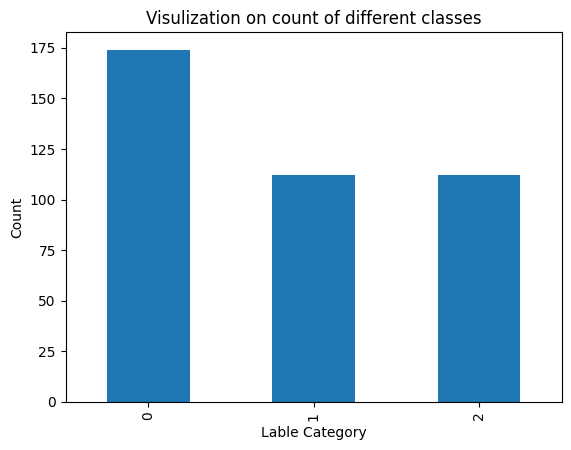

In [23]:
proportions = [cr_data[cr_data['Label'] == 0].shape[0]/cr_data.shape[0],
     cr_data[cr_data['Label'] == 1].shape[0]/cr_data.shape[0],
     cr_data[cr_data['Label'] == 2].shape[0]/cr_data.shape[0]]
print(proportions)
cr_data['Label'].value_counts().plot(kind = 'bar')
plt.xlabel('Lable Category')
plt.ylabel('Count')
plt.title('Visulization on count of different classes')
plt.show

Tokenization + URL & Special Character & Stop Word removal + Lower Case + Lemmatization

In [24]:
# Tokenization
token_cr = []
for row in cr_data['Tweets']:
  token_cr.append(row.split())
cr_data['tokens'] = token_cr

# URL Removal
token_cr_no_URL = []
for row in cr_data['tokens']:
  token_cr_no_URL.append([t for t in row if re.sub('http.+','', t) != ''])
cr_data['tokens_no_URL'] = token_cr_no_URL

# Special Character Removal + Lower Case
tokens_no_spec = []
for row in cr_data['tokens_no_URL']:
  tokens_no_spec.append([re.sub('\W','', t).lower() for t in row
                         if re.sub('\W','', t) != ''])
cr_data['tokens_no_spec'] = tokens_no_spec

# Stop Word Removal
sw = stopwords.words('english')[:100]
token_cr_stop = []
for row in cr_data['tokens_no_spec']:
  token_cr_stop.append([t for t in row if t not in sw])
cr_data['tokens_stop'] = token_cr_stop

# Lemmatization
cr_lemmatizer = WordNetLemmatizer()
token_cr_lem = []

for row in cr_data['tokens_stop']:
  token_cr_lem.append([cr_lemmatizer.lemmatize(t) for t in row])
cr_data['tokens_lem'] = token_cr_lem


Split DataSet into Test and Train, Count Vectorization and Fit Naive Bayes Model

In [25]:
from sklearn.model_selection import train_test_split
# Split DataSet
X_cr, y_cr = cr_data['tokens_lem'].to_numpy(), cr_data['Label'].to_numpy()
X_cr_train, X_cr_test, y_cr_train, y_cr_test =\
 train_test_split(X_cr, y_cr,test_size = 0.3, random_state = 666)

# Count Vectorization
def override_fcn(doc):
  return doc

count_vec_cr = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features= 1000)

countV_cr_train = count_vec_cr.fit_transform(X_cr_train)
countV_cr_test = count_vec_cr.transform(X_cr_test)

# Fit NB Model
nb_cr = MultinomialNB(alpha = 1)
nb_cr.fit(countV_cr_train, y_cr_train)

train_cr_preds = nb_cr.predict(countV_cr_train)
print("Train Accuracy:", accuracy_score(y_cr_train, train_cr_preds))

test_cr_preds = nb_cr.predict(countV_cr_test)
print("Test Accuracy:", accuracy_score(y_cr_test, test_cr_preds))

# Find Most Five Occurance Word in each Class
df_cr = pd.DataFrame()
df_cr['index 0'] = nb_cr.feature_count_[0]
df_cr['index 1'] = nb_cr.feature_count_[1]
df_cr['index 2'] = nb_cr.feature_count_[2]
print("TOP 8 words for Class 0:", [count_vec_cr.get_feature_names_out()[index]
       for index in df_cr['index 0'].nlargest(8).index], "\n With count:",
        [int(count) for count in df_cr['index 0'].nlargest(8)])
print("TOP 8 words for Class 1:", [count_vec_cr.get_feature_names_out()[index]
       for index in df_cr['index 1'].nlargest(8).index], "\n With count:",
        [int(count) for count in df_cr['index 1'].nlargest(8)])
print("TOP 8 words for Class 2:", [count_vec_cr.get_feature_names_out()[index]
       for index in df_cr['index 2'].nlargest(8).index], "\n With count:",
        [int(count) for count in df_cr['index 2'].nlargest(8)])

Train Accuracy: 0.9244604316546763
Test Accuracy: 0.6666666666666666
TOP 8 words for Class 0: ['update', 'clashroyale', 'balance', 'play', 'will', 'game', 'when', 'change'] 
 With count: [122, 109, 21, 21, 20, 17, 17, 15]
TOP 8 words for Class 1: ['clashroyale', 'update', 'new', 'card', 'balance', 'good', 'great', 'mastery'] 
 With count: [81, 81, 29, 17, 14, 13, 11, 11]
TOP 8 words for Class 2: ['clashroyale', 'update', 'balance', 'game', 'card', 'change', 'just', 'new'] 
 With count: [75, 60, 37, 28, 22, 20, 12, 12]


In [26]:
from sklearn.metrics import confusion_matrix
print("Train Data Set Confusion:\n", confusion_matrix(y_cr_train, train_cr_preds))
print("Test Data Set Confusion:\n", confusion_matrix(y_cr_test, test_cr_preds))


Train Data Set Confusion:
 [[114   0   1]
 [  7  76   1]
 [  9   3  67]]
Test Data Set Confusion:
 [[43  8  8]
 [ 8 20  0]
 [ 9  7 17]]


Try Using TFIDF

In [27]:
cr_tfidf = TfidfTransformer()

tf_cr_train = tfidf.fit_transform(countV_cr_train)
tf_cr_test = tfidf.transform(countV_cr_test)

nb_cr2 = MultinomialNB(alpha = 1)
nb_cr2.fit(tf_cr_train, y_cr_train)

train_cr_preds2 = nb_cr2.predict(tf_cr_train)
print("Train Accuracy:", accuracy_score(y_cr_train, train_cr_preds2))

test_cr_preds2 = nb_cr2.predict(tf_cr_test)
print("Test Accuracy:", accuracy_score(y_cr_test, test_cr_preds2))


Train Accuracy: 0.9172661870503597
Test Accuracy: 0.6666666666666666


In [28]:
print("Train Data Set Confusion:\n", confusion_matrix(y_cr_train, train_cr_preds2))
print("Test Data Set Confusion:\n", confusion_matrix(y_cr_test, test_cr_preds2))


Train Data Set Confusion:
 [[115   0   0]
 [  7  75   2]
 [ 12   2  65]]
Test Data Set Confusion:
 [[53  4  2]
 [12 16  0]
 [17  5 11]]


Try Support Vector Machine

In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(tf_cr_train, y_cr_train)

train_cr_pred3 = classifier.predict(tf_cr_train)
test_cr_pred3 = classifier.predict(tf_cr_test)
print("Train Accuracy:", accuracy_score(y_cr_train, train_cr_pred3))
print("Train Data Set Confusion:\n", confusion_matrix(y_cr_train, train_cr_pred3))
print("Test Accuracy:", accuracy_score(y_cr_test, test_cr_pred3))
print("Test Data Set Confusion:\n", confusion_matrix(y_cr_test, test_cr_pred3))

Train Accuracy: 0.9676258992805755
Train Data Set Confusion:
 [[114   0   1]
 [  2  80   2]
 [  4   0  75]]
Test Accuracy: 0.65
Test Data Set Confusion:
 [[44  7  8]
 [ 7 20  1]
 [13  6 14]]


Use Decision Tree

Train Accuracy: 0.5827338129496403
Train Data Set Confusion:
 [[103   0  12]
 [ 50  13  21]
 [ 33   0  46]]
Test Accuracy: 0.5083333333333333
Test Data Set Confusion:
 [[43  0 16]
 [20  3  5]
 [18  0 15]]


[Text(0.6710526315789473, 0.9166666666666666, 'update <= 0.075\ngini = 0.657\nsamples = 278\nvalue = [115, 84, 79]\nclass = 0'),
 Text(0.4473684210526316, 0.75, 'will <= 0.138\ngini = 0.649\nsamples = 114\nvalue = [29, 35, 50]\nclass = 2'),
 Text(0.2631578947368421, 0.5833333333333334, 'great <= 0.071\ngini = 0.63\nsamples = 104\nvalue = [21, 34, 49]\nclass = 2'),
 Text(0.15789473684210525, 0.4166666666666667, 'love <= 0.069\ngini = 0.623\nsamples = 96\nvalue = [21, 27, 48]\nclass = 2'),
 Text(0.10526315789473684, 0.25, 'change <= 0.214\ngini = 0.61\nsamples = 91\nvalue = [21, 22, 48]\nclass = 2'),
 Text(0.05263157894736842, 0.08333333333333333, 'gini = 0.575\nsamples = 77\nvalue = [12, 21, 44]\nclass = 2'),
 Text(0.15789473684210525, 0.08333333333333333, 'gini = 0.5\nsamples = 14\nvalue = [9, 1, 4]\nclass = 0'),
 Text(0.21052631578947367, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]\nclass = 1'),
 Text(0.3684210526315789, 0.4166666666666667, 'calling <= 0.124\ngini = 0.219\nsampl

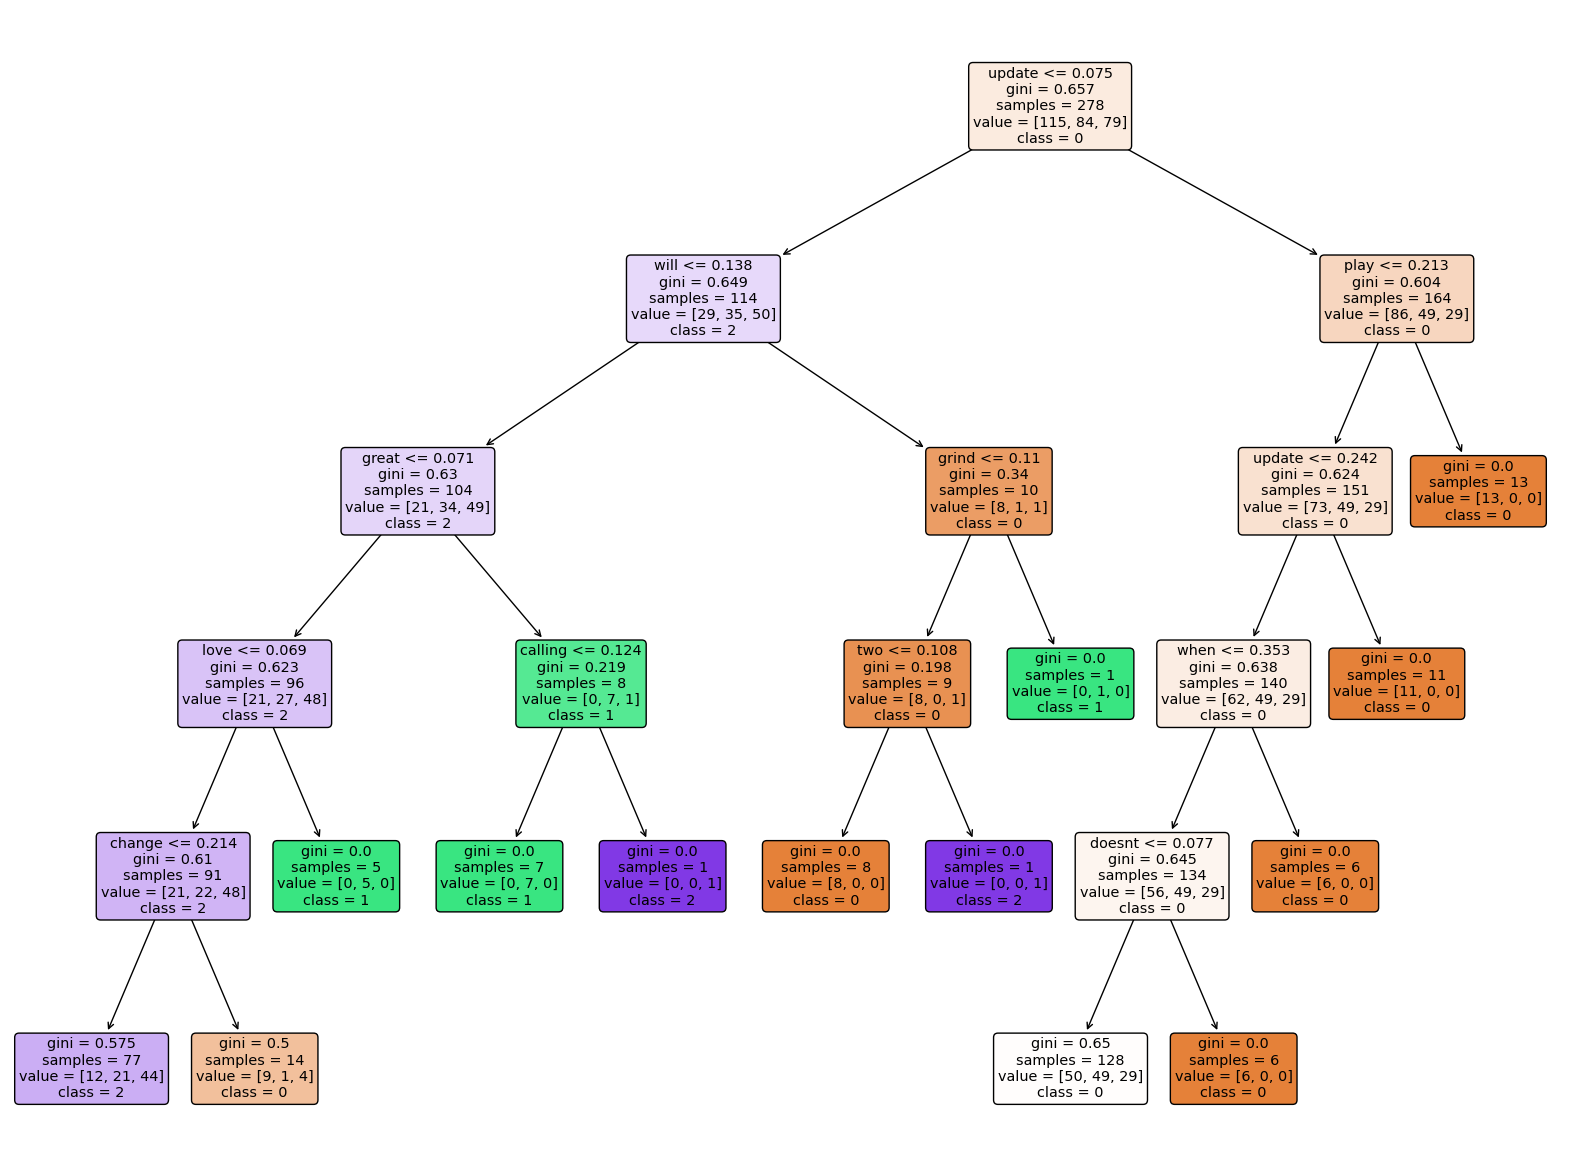

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier(max_depth = 5,
                             random_state = 666)
clf.fit(tf_cr_train, y_cr_train)

train_cr_pred4 = clf.predict(tf_cr_train)
test_cr_pred4 = clf.predict(tf_cr_test)
print("Train Accuracy:", accuracy_score(y_cr_train, train_cr_pred4))
print("Train Data Set Confusion:\n", confusion_matrix(y_cr_train, train_cr_pred4))
print("Test Accuracy:", accuracy_score(y_cr_test, test_cr_pred4))
print("Test Data Set Confusion:\n", confusion_matrix(y_cr_test, test_cr_pred4))
plt.figure(figsize=(20, 15))
plot_tree(clf,
          feature_names = [count_vec_cr.get_feature_names_out()[i] for i in range(0, 1000)],
          class_names = ['0', '1', '2'],
          filled = True,
          rounded = True)